## Data Prepration

In [13]:
import pandas as pd
import numpy as np

In [14]:
df=pd.read_csv(r'Final_Project_Dataset.csv')
df.head()

,frame.number,frame.time_epoch,frame.len,frame.cap_len,eth.src,eth.dst,ip.src,ip.dst,ip.len,ip.ttl,...,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.stream,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,Label
0,174,1.764528e+09,74,74,00:0c:29:9c:eb:bd,00:0c:29:49:20:6e,10.0.3.128,10.0.3.130,60.0,64.0,...,False,False,False,64240.0,0.0,0.000000,0.000000,NaN,NaN,1
1,175,1.764528e+09,74,74,00:0c:29:49:20:6e,00:0c:29:9c:eb:bd,10.0.3.130,10.0.3.128,60.0,64.0,...,False,False,False,5792.0,0.0,0.004497,0.004497,NaN,NaN,1
2,176,1.764528e+09,66,66,00:0c:29:9c:eb:bd,00:0c:29:49:20:6e,10.0.3.128,10.0.3.130,52.0,64.0,...,False,False,False,502.0,0.0,0.000342,0.004839,NaN,NaN,1
3,177,1.764528e+09,86,86,00:0c:29:49:20:6e,00:0c:29:9c:eb:bd,10.0.3.130,10.0.3.128,72.0,64.0,...,False,False,True,181.0,0.0,0.010313,0.015152,220.0,NaN,1
4,178,1.764528e+09,66,66,00:0c:29:9c:eb:bd,00:0c:29:49:20:6e,10.0.3.128,10.0.3.130,52.0,64.0,...,False,False,False,502.0,0.0,0.000068,0.015220,NaN,NaN,1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720829 entries, 0 to 720828
Data columns (total 30 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.number           720829 non-null  int64  
 1   frame.time_epoch       720829 non-null  float64
 2   frame.len              720829 non-null  int64  
 3   frame.cap_len          720829 non-null  int64  
 4   eth.src                720829 non-null  object 
 5   eth.dst                720829 non-null  object 
 6   ip.src                 720829 non-null  object 
 7   ip.dst                 720829 non-null  object 
 8   ip.len                 720829 non-null  float64
 9   ip.ttl                 720829 non-null  float64
 10  ip.proto               720829 non-null  float64
 11  tcp.srcport            720829 non-null  float64
 12  tcp.dstport            720829 non-null  float64
 13  tcp.len                720829 non-null  float64
 14  tcp.seq                720829 non-nu

In [16]:
df.columns

Index(['frame.number', 'frame.time_epoch', 'frame.len', 'frame.cap_len',
       'eth.src', 'eth.dst', 'ip.src', 'ip.dst', 'ip.len', 'ip.ttl',
       'ip.proto', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.seq',
       'tcp.ack', 'tcp.hdr_len', 'tcp.flags', 'tcp.flags.syn', 'tcp.flags.ack',
       'tcp.flags.fin', 'tcp.flags.reset', 'tcp.flags.push',
       'tcp.window_size_value', 'tcp.stream', 'tcp.time_delta',
       'tcp.time_relative', 'ftp.response.code', 'ftp.request.command',
       'Label'],
      dtype='object')

## Cleaning and Preprocessing

In [17]:
columns_to_drop = ['frame.number','tcp.stream','frame.cap_len','eth.src','eth.dst','ip.src','ip.dst','ip.proto', 'frame.time_epoch','tcp.seq','tcp.ack']
df = df.drop(columns=columns_to_drop, axis=1)

In [8]:
df.head()

,frame.len,ip.len,ip.ttl,tcp.srcport,tcp.dstport,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,Label
0,74,60.0,64.0,44403.0,21.0,0.0,40.0,0x0002,True,False,False,False,False,64240.0,0.000000,0.000000,NaN,NaN,1
1,74,60.0,64.0,21.0,44403.0,0.0,40.0,0x0012,True,True,False,False,False,5792.0,0.004497,0.004497,NaN,NaN,1
2,66,52.0,64.0,44403.0,21.0,0.0,32.0,0x0010,False,True,False,False,False,502.0,0.000342,0.004839,NaN,NaN,1
3,86,72.0,64.0,21.0,44403.0,20.0,32.0,0x0018,False,True,False,False,True,181.0,0.010313,0.015152,220.0,NaN,1
4,66,52.0,64.0,44403.0,21.0,0.0,32.0,0x0010,False,True,False,False,False,502.0,0.000068,0.015220,NaN,NaN,1


In [18]:
categorical_columns= df.select_dtypes(include=['object']).columns
categorical_columns

Index(['tcp.flags', 'ftp.request.command'], dtype='object')

In [19]:
df.shape

(720829, 19)

In [20]:
df_copy = df.copy()

In [21]:
flag_cols = [
    "tcp.flags.syn",
    "tcp.flags.ack",
    "tcp.flags.fin",
    "tcp.flags.reset",
    "tcp.flags.push"
]

df_copy = df_copy.drop(df_copy[df_copy[flag_cols].isna().all(axis=1)].index)

In [22]:
df_copy.shape

(720829, 19)

In [24]:
df_copy['Label'].value_counts()

Label
0    482472
1    238357
Name: count, dtype: int64

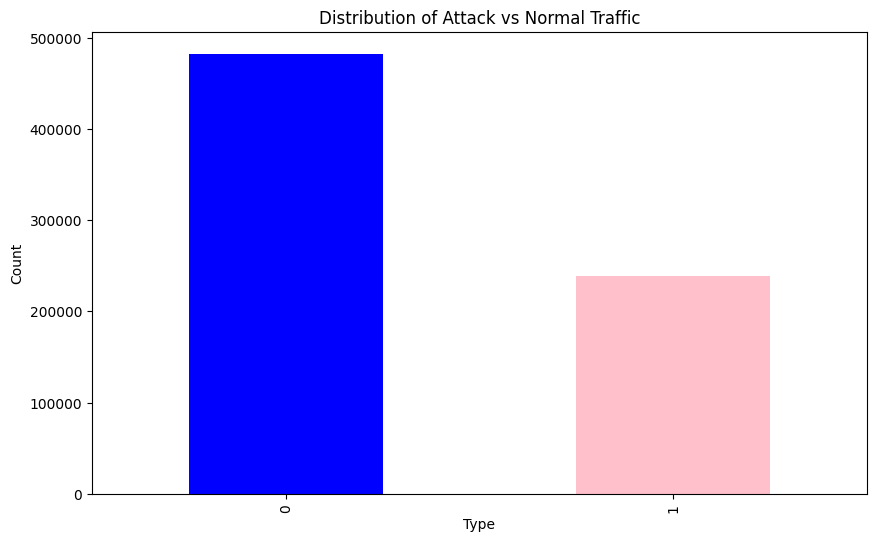

In [25]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
df_copy['Label'].value_counts().plot(kind='bar', color=['blue', 'pink'])
plt.title('Distribution of Attack vs Normal Traffic')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

In [26]:
df_copy.head()

,frame.len,ip.len,ip.ttl,tcp.srcport,tcp.dstport,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,Label
0,74,60.0,64.0,44403.0,21.0,0.0,40.0,0x0002,True,False,False,False,False,64240.0,0.000000,0.000000,NaN,NaN,1
1,74,60.0,64.0,21.0,44403.0,0.0,40.0,0x0012,True,True,False,False,False,5792.0,0.004497,0.004497,NaN,NaN,1
2,66,52.0,64.0,44403.0,21.0,0.0,32.0,0x0010,False,True,False,False,False,502.0,0.000342,0.004839,NaN,NaN,1
3,86,72.0,64.0,21.0,44403.0,20.0,32.0,0x0018,False,True,False,False,True,181.0,0.010313,0.015152,220.0,NaN,1
4,66,52.0,64.0,44403.0,21.0,0.0,32.0,0x0010,False,True,False,False,False,502.0,0.000068,0.015220,NaN,NaN,1


In [27]:
df_copy.isna().sum()

frame.len                     0
ip.len                        0
ip.ttl                        0
tcp.srcport                   0
tcp.dstport                   0
tcp.len                       0
tcp.hdr_len                   0
tcp.flags                     0
tcp.flags.syn                 0
tcp.flags.ack                 0
tcp.flags.fin                 0
tcp.flags.reset               0
tcp.flags.push                0
tcp.window_size_value         0
tcp.time_delta                0
tcp.time_relative             0
ftp.response.code        665024
ftp.request.command      676086
Label                         0
dtype: int64

In [28]:
df_copy['ftp.response.code'].value_counts()

ftp.response.code
331.0    16136
530.0    14368
220.0    10333
221.0     4852
500.0     2624
503.0     1309
150.0      967
229.0      966
226.0      966
200.0      567
213.0      567
250.0      567
230.0      465
211.0      401
215.0      400
350.0      282
421.0       31
257.0        2
227.0        1
300.0        1
Name: count, dtype: int64

In [29]:
df_copy['ftp.request.command'].value_counts()

ftp.request.command
USER                   19029
PASS                   16136
QUIT                    4852
EPSV                     966
TYPE                     567
SYST                     401
FEAT                     399
LIST                     399
STOR                     284
SIZE                     284
RETR                     284
MDTM                     283
RNFR                     282
DELE                     282
RNTO                     282
AUTH                       2
CWD                        2
PWD                        2
PASV                       1
                        1
����E��
W�?�'��3        1
�                     1
STAT                       1
PORT                       1
RMD                        1
Name: count, dtype: int64

In [30]:
for i in categorical_columns:
    print(f"\nValue counts for column: {i}")
    print(df_copy[i].value_counts())


Value counts for column: tcp.flags
tcp.flags
0x0010    475033
0x0018    186551
0x0011     17187
0x0002     12516
0x0012     12515
0x0004     11342
0x0014      4422
0x0019      1256
0x0000         4
0x08c2         1
0x002b         1
0x0029         1
Name: count, dtype: int64

Value counts for column: ftp.request.command
ftp.request.command
USER                   19029
PASS                   16136
QUIT                    4852
EPSV                     966
TYPE                     567
SYST                     401
FEAT                     399
LIST                     399
STOR                     284
SIZE                     284
RETR                     284
MDTM                     283
RNFR                     282
DELE                     282
RNTO                     282
AUTH                       2
CWD                        2
PWD                        2
PASV                       1
                        1
����E��W�?�'��3        1
�                     1
STAT                

In [31]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in categorical_columns:
    df_copy[col] = le.fit_transform(df_copy[col].astype(str))
df_copy.head()

,frame.len,ip.len,ip.ttl,tcp.srcport,tcp.dstport,tcp.len,tcp.hdr_len,tcp.flags,tcp.flags.syn,tcp.flags.ack,tcp.flags.fin,tcp.flags.reset,tcp.flags.push,tcp.window_size_value,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,Label
0,74,60.0,64.0,44403.0,21.0,0.0,40.0,1,True,False,False,False,False,64240.0,0.000000,0.000000,NaN,25,1
1,74,60.0,64.0,21.0,44403.0,0.0,40.0,5,True,True,False,False,False,5792.0,0.004497,0.004497,NaN,25,1
2,66,52.0,64.0,44403.0,21.0,0.0,32.0,3,False,True,False,False,False,502.0,0.000342,0.004839,NaN,25,1
3,86,72.0,64.0,21.0,44403.0,20.0,32.0,7,False,True,False,False,True,181.0,0.010313,0.015152,220.0,25,1
4,66,52.0,64.0,44403.0,21.0,0.0,32.0,3,False,True,False,False,False,502.0,0.000068,0.015220,NaN,25,1


In [32]:
df_copy.isna().sum()

frame.len                     0
ip.len                        0
ip.ttl                        0
tcp.srcport                   0
tcp.dstport                   0
tcp.len                       0
tcp.hdr_len                   0
tcp.flags                     0
tcp.flags.syn                 0
tcp.flags.ack                 0
tcp.flags.fin                 0
tcp.flags.reset               0
tcp.flags.push                0
tcp.window_size_value         0
tcp.time_delta                0
tcp.time_relative             0
ftp.response.code        665024
ftp.request.command           0
Label                         0
dtype: int64

In [33]:
df_copy['ftp.response.code'].value_counts()

ftp.response.code
331.0    16136
530.0    14368
220.0    10333
221.0     4852
500.0     2624
503.0     1309
150.0      967
229.0      966
226.0      966
200.0      567
213.0      567
250.0      567
230.0      465
211.0      401
215.0      400
350.0      282
421.0       31
257.0        2
227.0        1
300.0        1
Name: count, dtype: int64

In [35]:
df_copy[df_copy['ftp.response.code'] == 530]['Label'].value_counts()

Label
1    14341
0       27
Name: count, dtype: int64

In [36]:
df_copy['ftp.response.code']=le.fit_transform(df_copy['ftp.response.code'].astype(str))

In [37]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720829 entries, 0 to 720828
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   frame.len              720829 non-null  int64  
 1   ip.len                 720829 non-null  float64
 2   ip.ttl                 720829 non-null  float64
 3   tcp.srcport            720829 non-null  float64
 4   tcp.dstport            720829 non-null  float64
 5   tcp.len                720829 non-null  float64
 6   tcp.hdr_len            720829 non-null  float64
 7   tcp.flags              720829 non-null  int32  
 8   tcp.flags.syn          720829 non-null  bool   
 9   tcp.flags.ack          720829 non-null  bool   
 10  tcp.flags.fin          720829 non-null  bool   
 11  tcp.flags.reset        720829 non-null  bool   
 12  tcp.flags.push         720829 non-null  bool   
 13  tcp.window_size_value  720829 non-null  float64
 14  tcp.time_delta         720829 non-nu

## Feature Selection

In [38]:
df_copy.describe()

,frame.len,ip.len,ip.ttl,tcp.srcport,tcp.dstport,tcp.len,tcp.hdr_len,tcp.flags,tcp.window_size_value,tcp.time_delta,tcp.time_relative,ftp.response.code,ftp.request.command,Label
count,720829.000000,720829.000000,720829.000000,720829.000000,720829.000000,720829.000000,720829.000000,720829.000000,720829.000000,7.208290e+05,720829.000000,720829.000000,720829.000000,720829.000000
mean,2819.238556,2805.163445,65.361179,32298.654946,36184.255640,2753.411970,31.751475,4.070437,22439.733167,1.088563e-01,1.884637,19.400034,24.487537,0.330671
std,8323.562467,8323.587393,9.236213,21087.627284,20460.110783,8323.549037,3.282559,1.809002,22354.106981,2.801412e+00,12.381719,2.636000,2.610233,0.470455
min,54.000000,40.000000,38.000000,21.000000,21.000000,0.000000,20.000000,0.000000,0.000000,-5.185200e-05,0.000000,0.000000,0.000000,0.000000
25%,66.000000,52.000000,64.000000,11628.000000,27950.000000,0.000000,32.000000,3.000000,502.000000,9.000000e-08,0.012289,20.000000,25.000000,0.000000
50%,66.000000,52.000000,64.000000,36916.000000,42100.000000,0.000000,32.000000,3.000000,17298.000000,3.287200e-05,0.034792,20.000000,25.000000,0.000000
75%,86.000000,72.000000,64.000000,49859.000000,51628.000000,20.000000,32.000000,7.000000,46713.000000,3.036250e-04,0.112308,20.000000,25.000000,1.000000
max,65226.000000,65212.000000,128.000000,65503.000000,65503.000000,65160.000000,52.000000,11.000000,65535.000000,3.013427e+02,1204.140989,20.000000,25.000000,1.000000


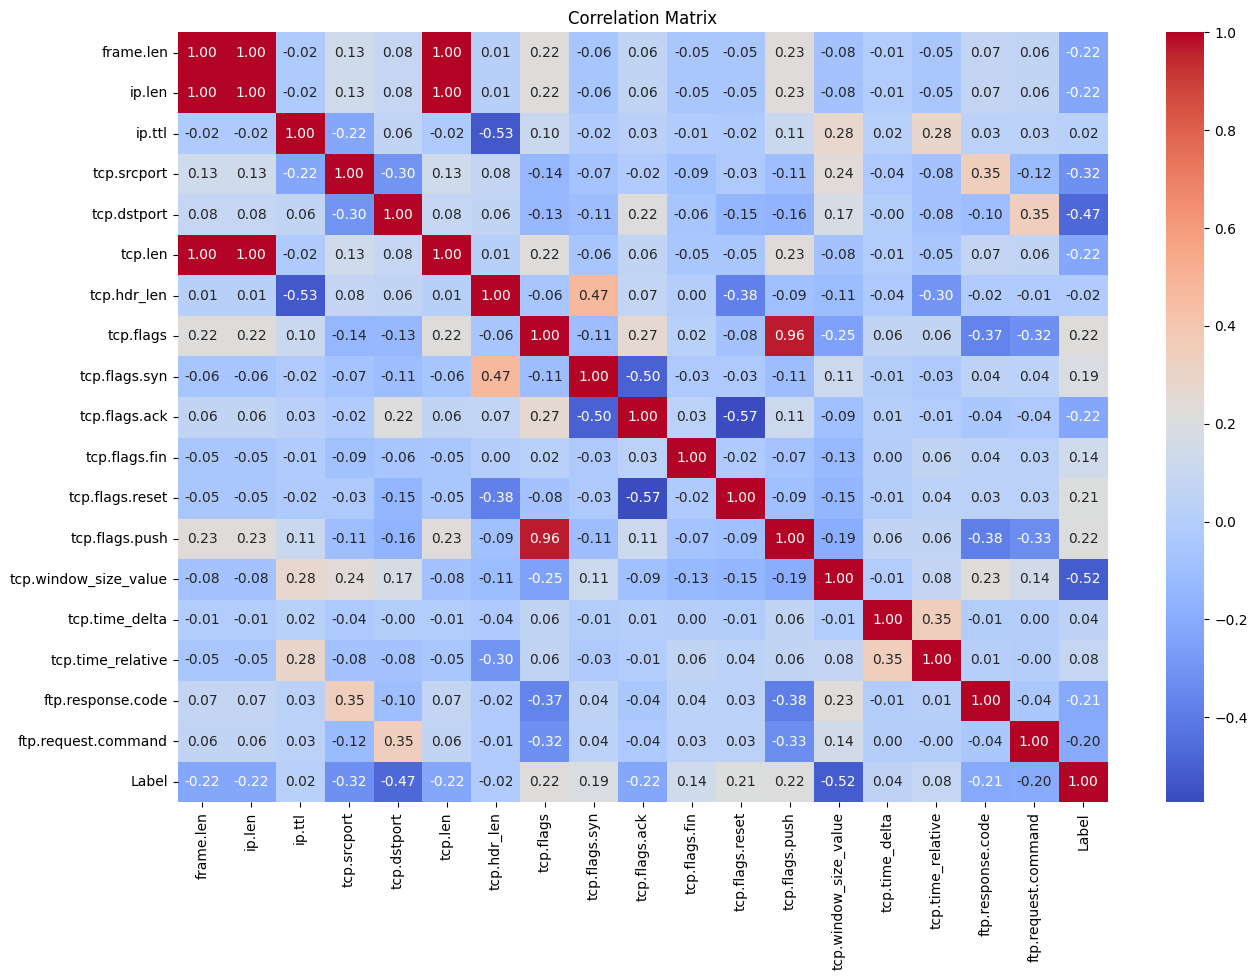

In [39]:
import seaborn as sns
corr=df_copy.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [42]:
from sklearn.feature_selection import SelectKBest, f_classif
X = df_copy.drop('Label', axis=1)
y = df_copy['Label']

selector = SelectKBest(score_func=f_classif, k=10)
X_new = selector.fit_transform(X, y)

selected_features = X.columns[selector.get_support()]
print("Selected features (ANOVA):", list(selected_features))

Selected features (ANOVA): ['frame.len', 'ip.len', 'tcp.srcport', 'tcp.dstport', 'tcp.len', 'tcp.flags', 'tcp.flags.ack', 'tcp.flags.reset', 'tcp.flags.push', 'tcp.window_size_value']


In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.2, random_state=42, stratify=y)

## Model Building

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
model = LogisticRegression()


In [45]:
model.fit(X_train, y_train)

C:\Users\Mariam\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [46]:
y_pred = model.predict(X_test)

In [47]:
print('Classification Report for Logistic Regression:\n',classification_report(y_test, y_pred))

Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93     96495
           1       0.85      0.88      0.86     47671

    accuracy                           0.91    144166
   macro avg       0.89      0.90      0.90    144166
weighted avg       0.91      0.91      0.91    144166



In [48]:
from sklearn.metrics import recall_score

In [49]:
print('Logistic Regression train recall:', recall_score(y_train, model.predict(X_train)))
print('Logistic Regression test recall:', recall_score(y_test, y_pred))
print('Logistic Regression train_accuracy:', accuracy_score(y_train, model.predict(X_train)))
print('Logistic Regression test_accuracy:', accuracy_score(y_test, y_pred))

Logistic Regression train recall: 0.875302853906422
Logistic Regression test recall: 0.8765706614084035
Logistic Regression train_accuracy: 0.9073410293360247
Logistic Regression test_accuracy: 0.9082030437134969


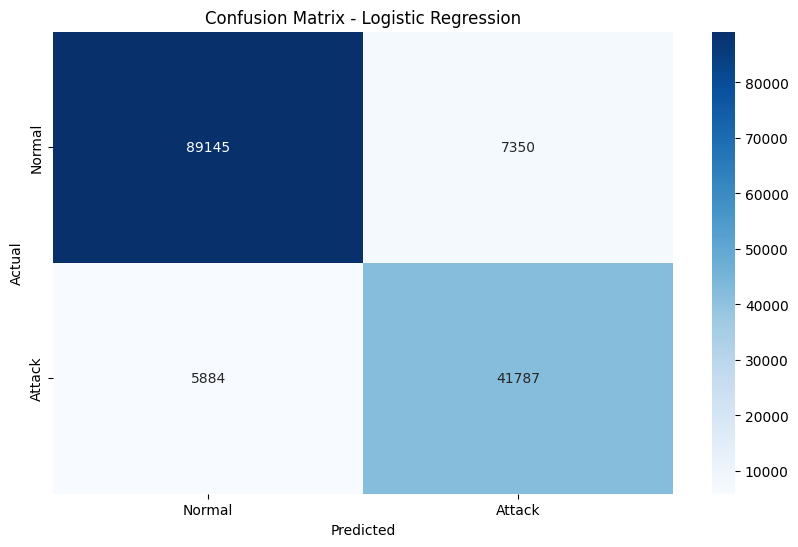

In [50]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

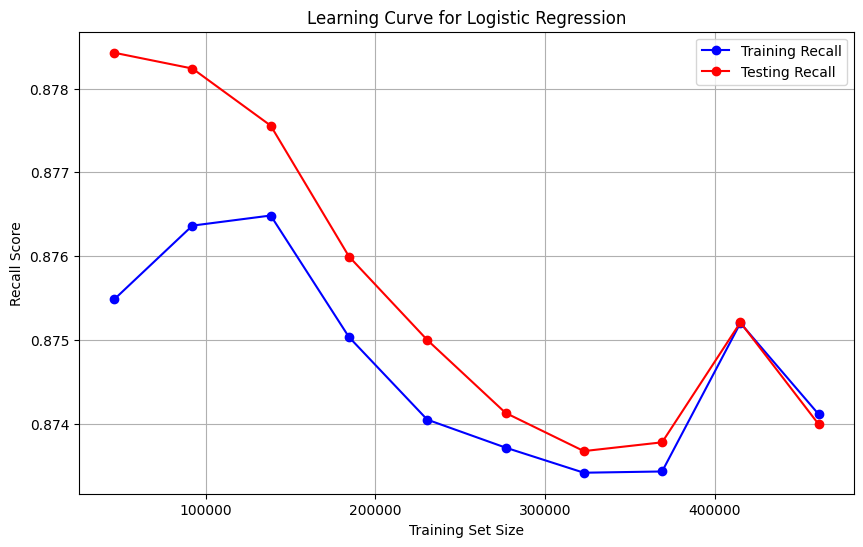

In [51]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Training Recall')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Testing Recall')
plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend()
plt.grid()
plt.show()

In [53]:
import joblib

joblib.dump(model, 'logistic_regression_model.pkl')
print("Logistic Regression model saved as 'logistic_regression_model.pkl'")

Logistic Regression model saved as 'logistic_regression_model.pkl'


In [54]:
from sklearn.svm import LinearSVC
model_svm = LinearSVC()
model_svm.fit(X_train, y_train)

LinearSVC()

In [55]:
svm_pred = model_svm.predict(X_test)

In [56]:
print('SVC train_accuracy:', accuracy_score(y_train, model_svm.predict(X_train)))
print('SVC test_accuracy:', accuracy_score(y_test, svm_pred))
print('SVC train_recall:', recall_score(y_train, model_svm.predict(X_train)))
print('SVC test_recall:', recall_score(y_test, svm_pred))

SVC train_accuracy: 0.9102422038521633
SVC test_accuracy: 0.9112550809483512
SVC train_recall: 0.8940929066633103
SVC test_recall: 0.8960374231713201


In [57]:
print('Classification Report for SVM:\n',classification_report(y_test, svm_pred))

Classification Report for SVM:
               precision    recall  f1-score   support

           0       0.95      0.92      0.93     96495
           1       0.84      0.90      0.87     47671

    accuracy                           0.91    144166
   macro avg       0.90      0.91      0.90    144166
weighted avg       0.91      0.91      0.91    144166



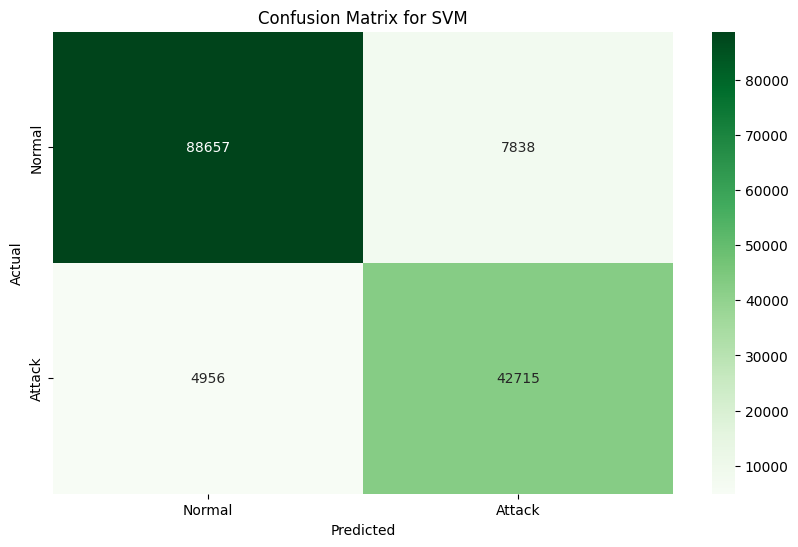

In [58]:
plt.figure(figsize=(10,6))
cm_svm = confusion_matrix(y_test, svm_pred)
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Greens', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for SVM')
plt.show()

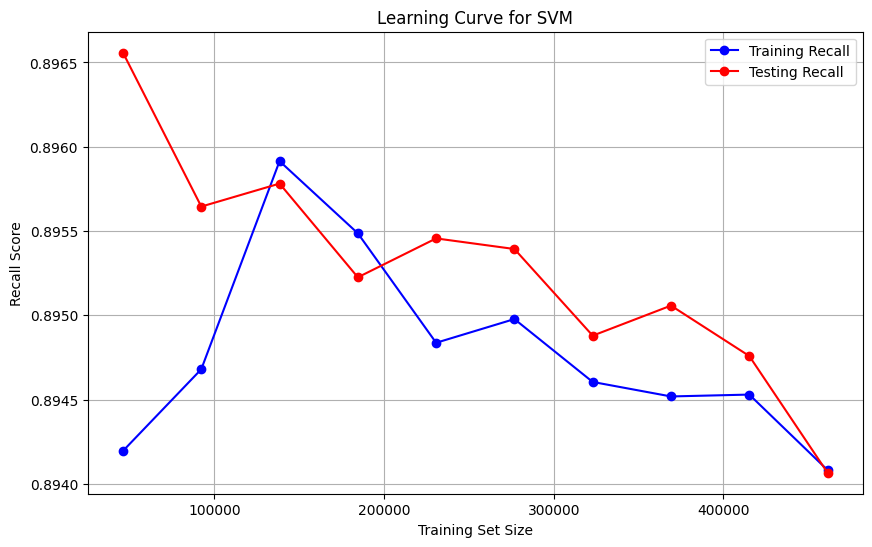

In [59]:
train_sizes_svm, train_scores_svm, test_scores_svm = learning_curve(
    model_svm, X_train, y_train, cv=5, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_svm_mean = np.mean(train_scores_svm, axis=1)
test_scores_svm_mean = np.mean(test_scores_svm, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes_svm, train_scores_svm_mean, 'o-', color='blue', label='Training Recall')
plt.plot(train_sizes_svm, test_scores_svm_mean, 'o-', color='red', label='Testing Recall')
plt.title('Learning Curve for SVM')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend()
plt.grid()
plt.show()

In [60]:
joblib.dump(model, 'SVM_model.pkl')
print("SVM model saved as 'SVM_model.pkl'")

SVM model saved as 'SVM_model.pkl'


In [61]:
from sklearn.ensemble import RandomForestClassifier
model_rf = RandomForestClassifier(n_estimators=100, max_depth=10,min_samples_leaf=5,min_samples_split=20,n_jobs=-1, random_state=42)
model_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, min_samples_split=20,
                       n_jobs=-1, random_state=42)

In [62]:
rf_pred = model_rf.predict(X_test)

In [63]:
print('Random Forest train_accuracy:', accuracy_score(y_train, model_rf.predict(X_train)))
print('Random Forest test_accuracy:', accuracy_score(y_test, rf_pred))
print('Random Forest train_recall:', recall_score(y_train, model_rf.predict(X_train)))
print('Random Forest test_recall:', recall_score(y_test, rf_pred))

Random Forest train_accuracy: 0.9890091786710783
Random Forest test_accuracy: 0.9889641108166974
Random Forest train_recall: 0.9903034307710057
Random Forest test_recall: 0.990119779320761


In [64]:
print('classification report for Random Forest:\n', classification_report(y_test, rf_pred))

classification report for Random Forest:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     96495
           1       0.98      0.99      0.98     47671

    accuracy                           0.99    144166
   macro avg       0.99      0.99      0.99    144166
weighted avg       0.99      0.99      0.99    144166



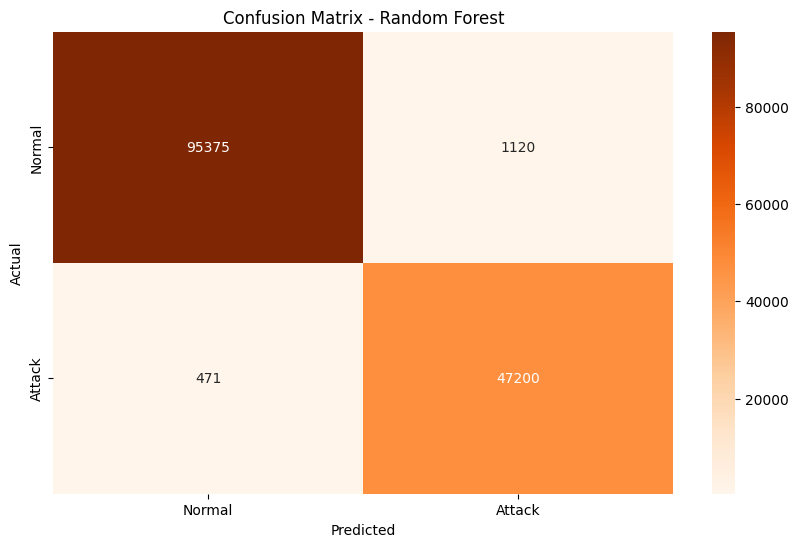

In [65]:
plt.figure(figsize=(10,6))
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges', xticklabels=['Normal', 'Attack'], yticklabels=['Normal', 'Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [49]:
from sklearn.model_selection import learning_curve

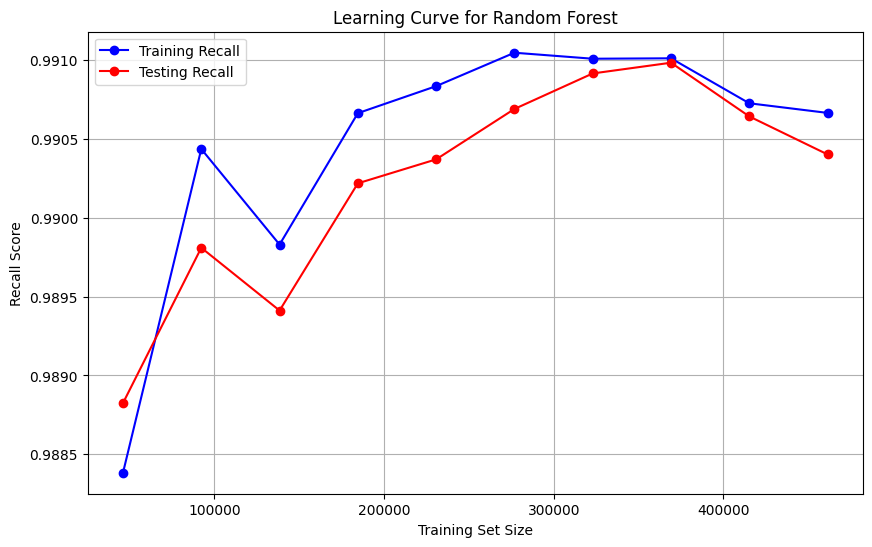

In [66]:
train_sizes_rf, train_scores_rf, test_scores_rf = learning_curve(
    model_rf, X_train, y_train, cv=5, scoring='recall', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_rf_mean = np.mean(train_scores_rf, axis=1)
test_scores_rf_mean = np.mean(test_scores_rf, axis=1)

plt.figure(figsize=(10,6))
plt.plot(train_sizes_rf, train_scores_rf_mean, 'o-', color='blue', label='Training Recall')
plt.plot(train_sizes_rf, test_scores_rf_mean, 'o-', color='red', label='Testing Recall')
plt.title('Learning Curve for Random Forest')
plt.xlabel('Training Set Size')
plt.ylabel('Recall Score')
plt.legend()
plt.grid()
plt.show()

In [67]:
joblib.dump(model_rf, 'Random_Forest_model.pkl')
print("Random Forest model saved as 'Random_Forest_model.pkl'")

Random Forest model saved as 'Random_Forest_model.pkl'
